# Importing necessary libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc

# Reading the CSV file into a Dataframe

In [2]:
df = pd.read_csv('Loantap.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# 1. Define Problem Statement and perform Exploratory Data Analysis

## Problem statement
To help LoanTap 
* Build a ML model which can credit-worthiness of a person given the details of the person.
* Also, interpret the predictions of the ML model and try and reduce False predictions to improve companies chances of earning interest by providing loans and also protecting them from giving loan to defaulters.

## 2. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

In [3]:
# Shape of the dataset
df.shape

(396030, 27)

In [4]:
# Checking data-type & other information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
# Checking for missing values
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [6]:
# Numerical & Categorical features
num_feat = [col for col in df.columns if df[col].dtype=='float64']
cat_feat = [col for col in df.columns if col not in num_feat]
print(f'Numerical features in the dataset: {num_feat}')
print(f'Categorical features in the dataset: {cat_feat}')

Numerical features in the dataset: ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
Categorical features in the dataset: ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


In [7]:
# Statistical summary (numerical features)
df[num_feat].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [8]:
# Statistical summary (categorical features)
df[cat_feat].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


### <u> Observations</u>

__Dataset shape__

There are __396030__ records and __27__ columns/features in the dataset.

__Columns/Features meaning__

The columns/features represent the following information:

* `loan_amnt` : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* `term` : The number of payments on the loan. Values are in months and can be either 36 or 60.
* `int_rate` : Interest Rate on the loan
* `installment` : The monthly payment owed by the borrower if the loan originates.
* `grade` : LoanTap assigned loan grade
* `sub_grade` : LoanTap assigned loan subgrade
* `emp_title` :The job title supplied by the Borrower when applying for the loan.*
* `emp_length` : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* `home_ownership` : The home ownership status provided by the borrower during registration or obtained from the credit report.
* `annual_inc` : The self-reported annual income provided by the borrower during registration.
* `verification_status` : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
* `issue_d` : The month which the loan was funded
* `loan_status` : Current status of the loan - Target Variable
* `purpose` : A category provided by the borrower for the loan request.
* `title` : The loan title provided by the borrower
* `dti` : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
* `earliest_cr_line` :The month the borrower's earliest reported credit line was opened
* `open_acc` : The number of open credit lines in the borrower's credit file.
* `pub_rec` : Number of derogatory public records
* `revol_bal` : Total credit revolving balance
* `revol_util` : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* `total_acc` : The total number of credit lines currently in the borrower's credit file
* `initial_list_status` : The initial listing status of the loan. Possible values are – W, F
* `application_type` : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* `mort_acc` : Number of mortgage accounts.
* `pub_rec_bankruptcies` : Number of public record bankruptcies
* `Address`: Address of the individual

__Data-type analysis__

The data type of few variables/features have mismatch e.g. `term` has object datatype but ideally should have integer/float datatype. These can be corrected during data preprocessing.

Out of the 27 columns/features:
* Numerical columns/features: `loan_amnt`, `int_rate`, `installment`, `annual_inc`, `dti`, `open_acc`, `pub_rec`, `revol_bal`, `revol_util`, `total_acc`, `mort_acc`, `pub_rec_bankruptcies`
* Categorical columns/features: `term`, `grade`, `sub_grade`, `emp_title`, `emp_length`, `home_ownership`, `verification_status`, `issue_d`, `loan_status`, `purpose`, `title`, `earliest_cr_line`, `initial_list_status`, `application_type`, `address`

__Missing values detection__

There are missing values present in the dataset.

__Statistical summary__

I'll be exploring the Statistical summary for each column/feature in the Non-graphical analysis section in more detail.

## Non Graphical analysis: Value counts, range & unique attributes

### <u>Numerical columns</u>

In [9]:
df[num_feat].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### <u>Categorical columns</u>

In [10]:
for i in cat_feat:
    print(f'Number of Categories in {i} feature: {df[i].nunique()}')
    print(f'Categories in {i} feature: {df[i].unique()}')
    print(f'Value counts of these categories: ')
    display(df[i].value_counts())
    print('-'*50)
    print()

Number of Categories in term feature: 2
Categories in term feature: [' 36 months' ' 60 months']
Value counts of these categories: 


 36 months    302005
 60 months     94025
Name: term, dtype: int64

--------------------------------------------------

Number of Categories in grade feature: 7
Categories in grade feature: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
Value counts of these categories: 


B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

--------------------------------------------------

Number of Categories in sub_grade feature: 35
Categories in sub_grade feature: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
Value counts of these categories: 


B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

--------------------------------------------------

Number of Categories in emp_title feature: 173105
Categories in emp_title feature: ['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc']
Value counts of these categories: 


Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

--------------------------------------------------

Number of Categories in emp_length feature: 11
Categories in emp_length feature: ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]
Value counts of these categories: 


10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

--------------------------------------------------

Number of Categories in home_ownership feature: 6
Categories in home_ownership feature: ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE' 'ANY']
Value counts of these categories: 


MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

--------------------------------------------------

Number of Categories in verification_status feature: 3
Categories in verification_status feature: ['Not Verified' 'Source Verified' 'Verified']
Value counts of these categories: 


Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

--------------------------------------------------

Number of Categories in issue_d feature: 115
Categories in issue_d feature: ['Jan-2015' 'Nov-2014' 'Apr-2013' 'Sep-2015' 'Sep-2012' 'Oct-2014'
 'Apr-2012' 'Jun-2013' 'May-2014' 'Dec-2015' 'Apr-2015' 'Oct-2012'
 'Jul-2014' 'Feb-2013' 'Oct-2015' 'Jan-2014' 'Mar-2016' 'Apr-2014'
 'Jun-2011' 'Apr-2010' 'Jun-2014' 'Oct-2013' 'May-2013' 'Feb-2015'
 'Oct-2011' 'Jun-2015' 'Aug-2013' 'Feb-2014' 'Dec-2011' 'Mar-2013'
 'Jun-2016' 'Mar-2014' 'Nov-2013' 'Dec-2014' 'Apr-2016' 'Sep-2013'
 'May-2016' 'Jul-2015' 'Jul-2013' 'Aug-2014' 'May-2008' 'Mar-2010'
 'Dec-2013' 'Mar-2012' 'Mar-2015' 'Sep-2011' 'Jul-2012' 'Dec-2012'
 'Sep-2014' 'Nov-2012' 'Nov-2015' 'Jan-2011' 'May-2012' 'Feb-2016'
 'Jun-2012' 'Aug-2012' 'Jan-2016' 'May-2015' 'Oct-2016' 'Aug-2015'
 'Jul-2016' 'May-2009' 'Aug-2016' 'Jan-2012' 'Jan-2013' 'Nov-2010'
 'Jul-2011' 'Mar-2011' 'Feb-2012' 'May-2011' 'Aug-2010' 'Nov-2016'
 'Jul-2010' 'Sep-2010' 'Dec-2010' 'Feb-2011' 'Jun-2009' 'Aug-2011'
 

Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: issue_d, Length: 115, dtype: int64

--------------------------------------------------

Number of Categories in loan_status feature: 2
Categories in loan_status feature: ['Fully Paid' 'Charged Off']
Value counts of these categories: 


Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

--------------------------------------------------

Number of Categories in purpose feature: 14
Categories in purpose feature: ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']
Value counts of these categories: 


debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

--------------------------------------------------

Number of Categories in title feature: 48817
Categories in title feature: ['Vacation' 'Debt consolidation' 'Credit card refinancing' ...
 'Credit buster ' 'Loanforpayoff' 'Toxic Debt Payoff']
Value counts of these categories: 


Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

--------------------------------------------------

Number of Categories in earliest_cr_line feature: 684
Categories in earliest_cr_line feature: ['Jun-1990' 'Jul-2004' 'Aug-2007' 'Sep-2006' 'Mar-1999' 'Jan-2005'
 'Aug-2005' 'Sep-1994' 'Jun-1994' 'Dec-1997' 'Dec-1990' 'May-1984'
 'Apr-1995' 'Jan-1997' 'May-2001' 'Mar-1982' 'Sep-1996' 'Jan-1990'
 'Mar-2000' 'Jan-2006' 'Oct-2006' 'Jan-2003' 'May-2008' 'Oct-2003'
 'Jun-2004' 'Jan-1999' 'Apr-1994' 'Apr-1998' 'Jul-2007' 'Apr-2002'
 'Oct-2007' 'Jun-2009' 'May-1997' 'Jul-2006' 'Sep-2003' 'Aug-1992'
 'Dec-1988' 'Feb-2002' 'Jan-1992' 'Aug-2001' 'Dec-2010' 'Oct-1999'
 'Sep-2004' 'Aug-1994' 'Jul-2003' 'Apr-2000' 'Dec-2004' 'Jun-1995'
 'Dec-2003' 'Jul-1994' 'Oct-1990' 'Dec-2001' 'Apr-1999' 'Feb-1995'
 'May-2003' 'Oct-2002' 'Mar-2004' 'Aug-2003' 'Oct-2000' 'Nov-2004'
 'Mar-2010' 'Mar-1996' 'May-1994' 'Jun-1996' 'Nov-1986' 'Jan-2001'
 'Jan-2002' 'Mar-2001' 'Sep-2012' 'Apr-2006' 'May-1998' 'Dec-2002'
 'Nov-2003' 'Oct-2005' 'May-1990' 'Jun-2003' 'Jun-

Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

--------------------------------------------------

Number of Categories in initial_list_status feature: 2
Categories in initial_list_status feature: ['w' 'f']
Value counts of these categories: 


f    238066
w    157964
Name: initial_list_status, dtype: int64

--------------------------------------------------

Number of Categories in application_type feature: 3
Categories in application_type feature: ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']
Value counts of these categories: 


INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

--------------------------------------------------

Number of Categories in address feature: 393700
Categories in address feature: ['0174 Michelle Gateway\r\nMendozaberg, OK 22690'
 '1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113'
 '87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113' ...
 '953 Matthew Points Suite 414\r\nReedfort, NY 70466'
 '7843 Blake Freeway Apt. 229\r\nNew Michael, FL 29597'
 '787 Michelle Causeway\r\nBriannaton, AR 48052']
Value counts of these categories: 


USCGC Smith\r\nFPO AE 70466                           8
USS Johnson\r\nFPO AE 48052                           8
USNS Johnson\r\nFPO AE 05113                          8
USS Smith\r\nFPO AP 70466                             8
USNS Johnson\r\nFPO AP 48052                          7
                                                     ..
455 Tricia Cove\r\nAustinbury, FL 00813               1
7776 Flores Fall\r\nFernandezshire, UT 05113          1
6577 Mia Harbors Apt. 171\r\nRobertshire, OK 22690    1
8141 Cox Greens Suite 186\r\nMadisonstad, VT 05113    1
787 Michelle Causeway\r\nBriannaton, AR 48052         1
Name: address, Length: 393700, dtype: int64

--------------------------------------------------



__Observations:__
* Loan amount ranges from 500 - 40000 dollars. The mean loan amount is 14114 dollars
* Interest rate ranges from 5.32% - 31%. The mean interest rate is 13.64%
* Monthly installment for borrower ranges from 16 - 1534 dollars. The mean monthly installment is 432 dollars
* Annual income of the borrower ranges from 0 - 8706582 dollars. The mean annual income is 74203 dollars
* Debt to income ratio of a borrower ranges from 0 - 9999. The mean ratio is 17.4. Higher value of this ratio is not a good metric for a borrower to secure a loan.
* Number of open credit lines of a borrower ranges from 0 - 90. The mean # of open credit lines is 11.31. Higher the value for this number lower are the chances to secure a loan.
* Number of derogatory public records of a borrower ranges from 0 - 86. The mean is 0.178. More than 75% of the borrowers have no such records which is a good sign.
* Total credit revolving balance ranges from 0 - 1743266 dollars. The mean revolving balance is 15845 dollars.
* Revolving utilization rate ranges from 0 - 892. The mean is 54. In real life, keeping this number lower help increase the credit score and secure loans easily.
* Total number of credit lines of a borrower ranges from 2 - 151. The mean value is 25. 50% of people have taken credit around 24 in their life.
* Number of mortgage accounts ranges from 0 - 34. The mean value is 1.81.
* Public record of bankruptcies of a borrower ranges from 0 - 8. More than 75% of the borrowers have no such records.
* Majority of the loans are offered for 3 years and rest for 5 years. This smaller loan term maybe because the maximum loan amount is also less (40000 dollars).
* LoanTap assigns 7 grades to each borrower (A-G) with majority of loans falling under B & C grades
* LoanTap assigns 5 subgrades to each loan grades, hence 35 subgrades. B3 subgrade has the highest number of loans assigned to it.
* Borrowers who opt for a loan are mostly Teachers followed by Managers.
* Years of experiences of borrower ranges from 0-10+ years. Majority of the loans were applied by people with 10+ years of experience.
* Home ownership of the borrower is majorly either Mortgage followed by Rent and then fully-owned.
* Verification status of income by Loantap has 3 categories: Source verified, Verified & Not verified. The distribution among these 3 are approximately equal.
* The issued month of loan ranges from July, 2007 - Dec, 2016. Most of them were sanctioned in Oct & July of 2014.
* The loan status has 2 categories: Fully paid or Charged-off. There is huge __imbalance in the target label__, where 80% of the loans were fully paid while the rest 20% were charged-off.
* Purpose has 14 reasons for which the loan was applied for. Amongst them, majority of the loans were applied for Debt consolidation (pay off other debts) and Credit card debt reasons.
* Title feature also provide information of why the money was borrowed. According to me, this feature is useless as the Purpose feature captures this information.
* Earliest credit line of a borrower ranges from Jan, 1944 - Oct, 2013. 
* Initial list status of loan has 2 possible values: w & f. Majority of records have the status as f.
* Loan applications are of 3 types: Individual, Joint & Direct pay. 99.8% loans in the dataset are Individual loans and the rest are Joint followed by Direct pay.
* Address has information about address of the borrower.

## Univariate Graphical analysis

### <u>Categorical</u>
I'll not be plotting graphs for `emp_title`, `title` & `address` because of the sheer number of categories they have. I also think, information in `title` is captured in `purpose` feature and I don't have the skills yet to extract information from `address` feature.

### term

<AxesSubplot:xlabel='term', ylabel='count'>

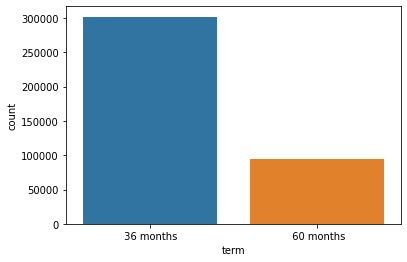

In [11]:
sns.countplot(x='term', data=df)

### grade

<AxesSubplot:xlabel='grade', ylabel='count'>

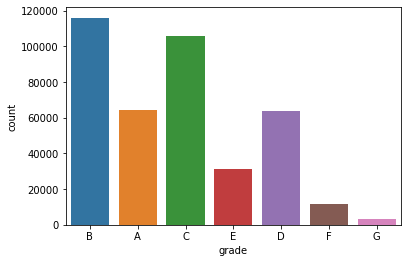

In [12]:
sns.countplot(x='grade', data=df)

### sub_grade

<AxesSubplot:xlabel='count', ylabel='sub_grade'>

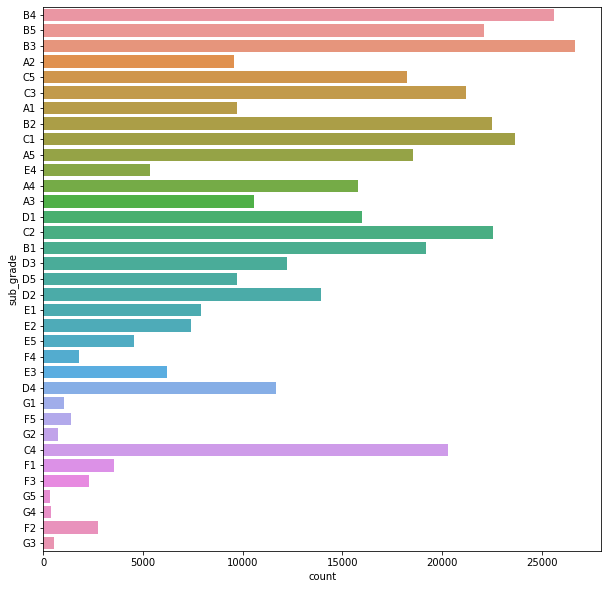

In [13]:
plt.figure(figsize=(10, 10))
sns.countplot(y=df['sub_grade'])

### emp_length

<AxesSubplot:xlabel='count', ylabel='emp_length'>

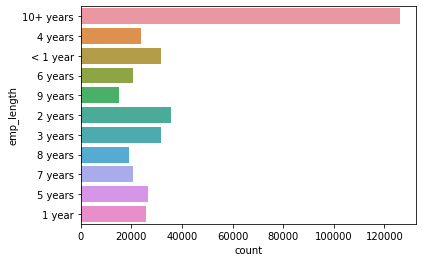

In [14]:
sns.countplot(y='emp_length', data=df)

### home_ownership

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

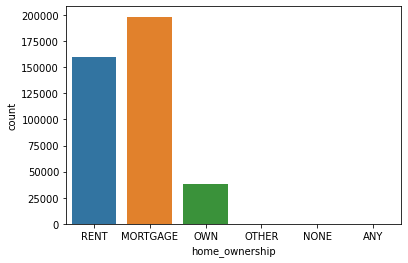

In [15]:
sns.countplot(x='home_ownership', data=df)

### verification_status

<AxesSubplot:xlabel='verification_status', ylabel='count'>

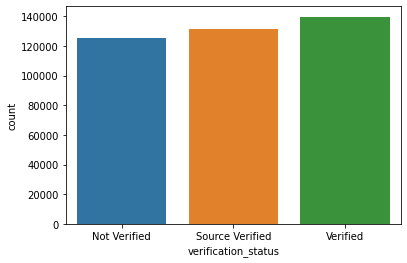

In [16]:
sns.countplot(x='verification_status', data=df)

### issue_d
I'll treat this variable as date-time feature

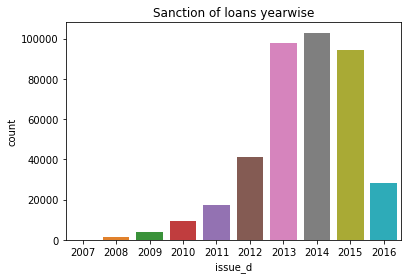

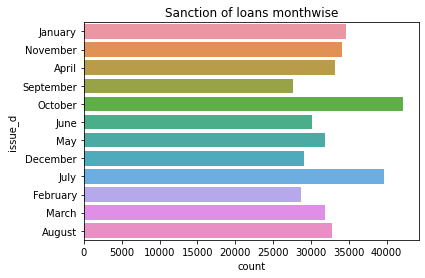

In [17]:
dates_1 = pd.to_datetime(df['issue_d'])

# Countplot based on year of sanction
sns.countplot(x=dates_1.dt.year)
plt.title('Sanction of loans yearwise')
plt.show()

# Countplot based on month of sanction
sns.countplot(y=dates_1.dt.month_name())
plt.title('Sanction of loans monthwise')
plt.show()

### loan_status

<AxesSubplot:xlabel='loan_status', ylabel='count'>

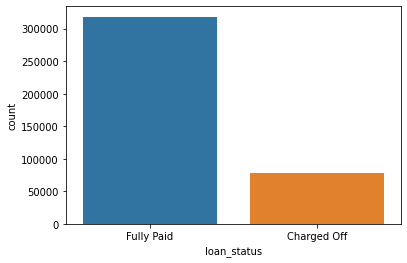

In [18]:
sns.countplot(x='loan_status', data=df)

### purpose

<AxesSubplot:xlabel='count', ylabel='purpose'>

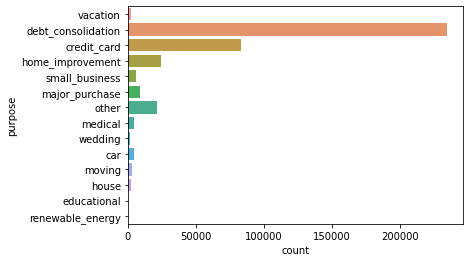

In [19]:
sns.countplot(y='purpose', data=df)

### earliest_cr_line
I'll treat this variable as date-time feature

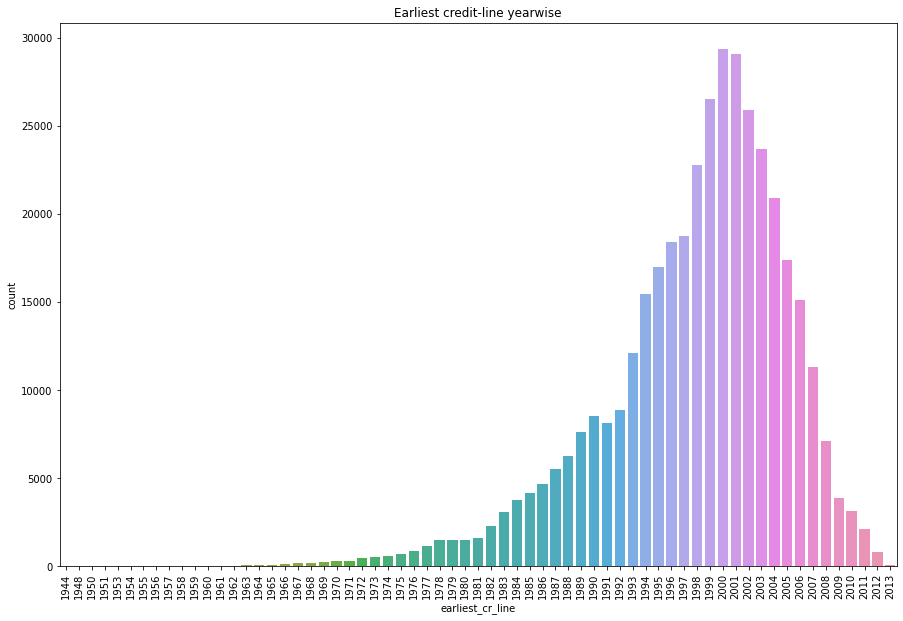

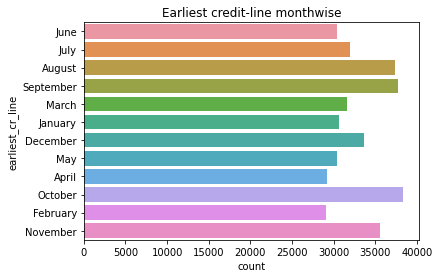

In [20]:
dates_2 = pd.to_datetime(df['earliest_cr_line'])


# Countplot based on year of earliest creditline
plt.figure(figsize=(15, 10))
sns.countplot(x=dates_2.dt.year)
plt.xticks(rotation=90)
plt.title('Earliest credit-line yearwise')
plt.show()

# Countplot based on month of earliest creditline
sns.countplot(y=dates_2.dt.month_name())
plt.title('Earliest credit-line monthwise')
plt.show()

### initial_list_status

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

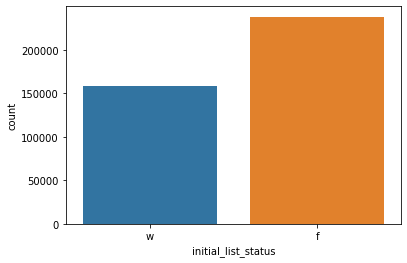

In [21]:
sns.countplot(x='initial_list_status', data=df)

### application_type

<AxesSubplot:xlabel='application_type', ylabel='count'>

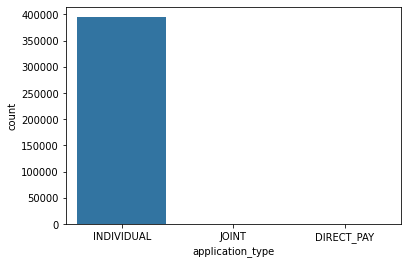

In [22]:
sns.countplot(x='application_type', data=df)

### <u>Numerical columns</u>

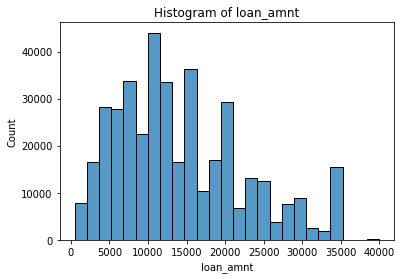

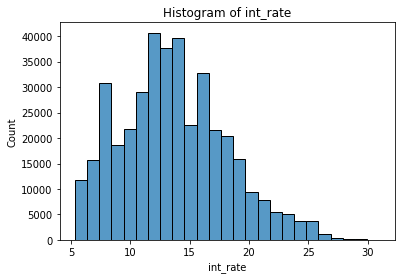

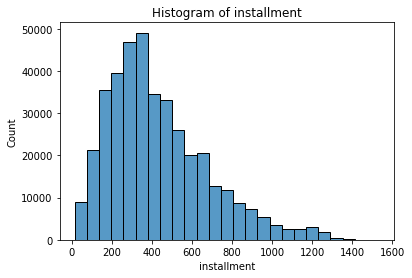

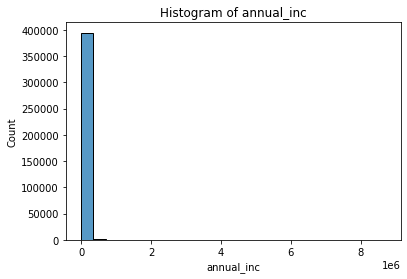

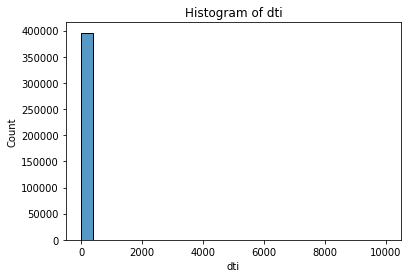

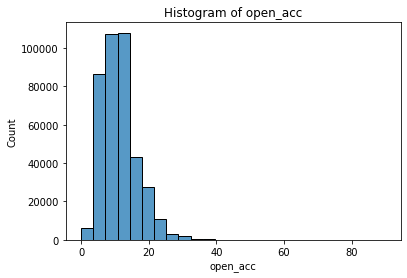

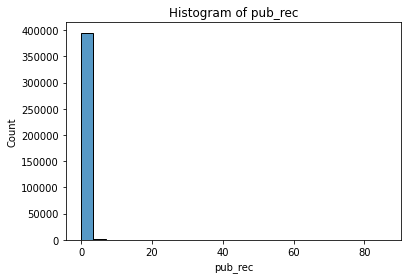

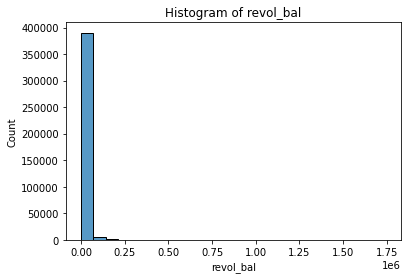

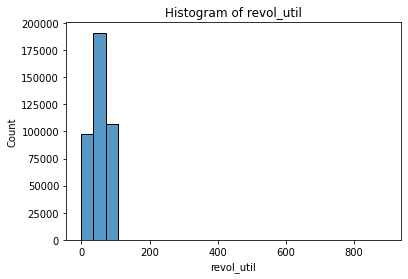

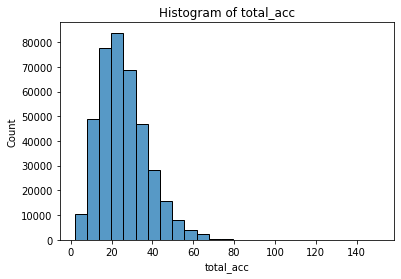

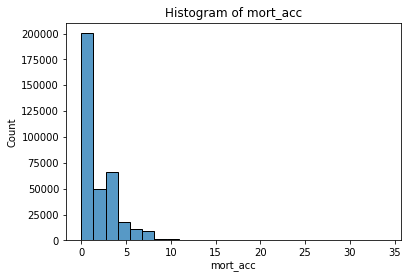

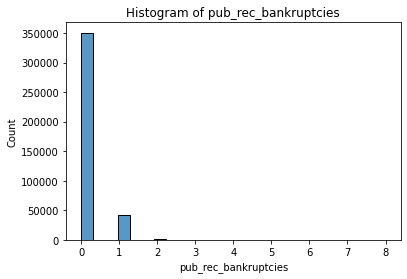

In [23]:
for feat in num_feat:
    sns.histplot(x=feat, data=df, bins=25)
    plt.title(f'Histogram of {feat}')
    plt.show()

## Bivariate analysis

### What is the relation of each independent feature with the dependent feature (Chance of Admit)?

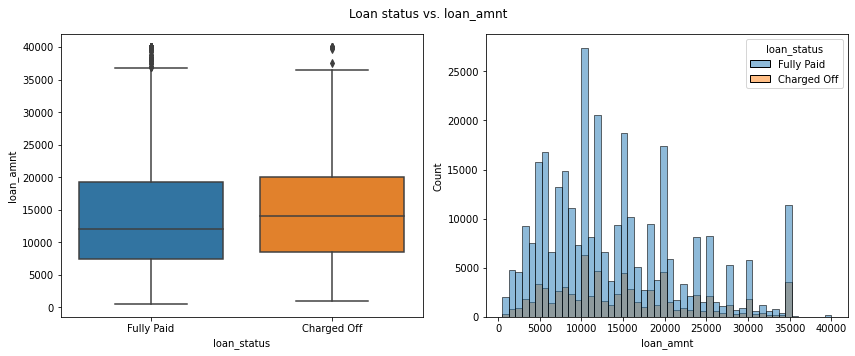

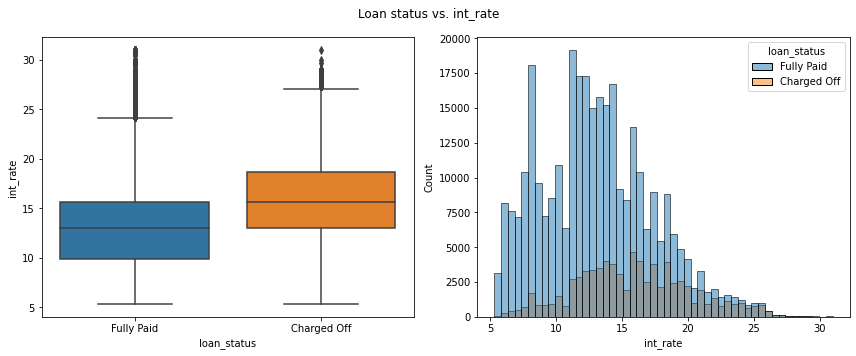

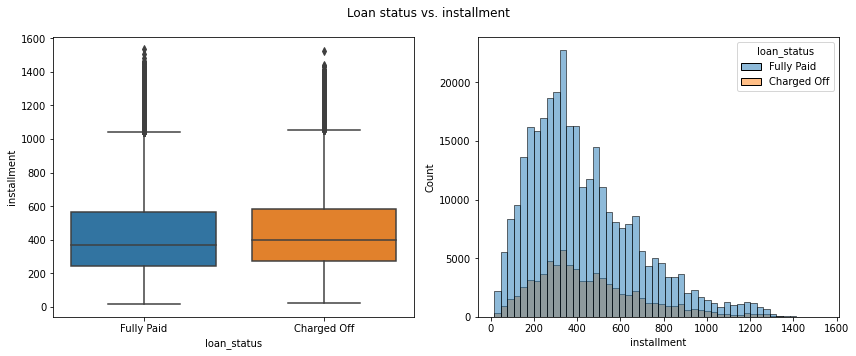

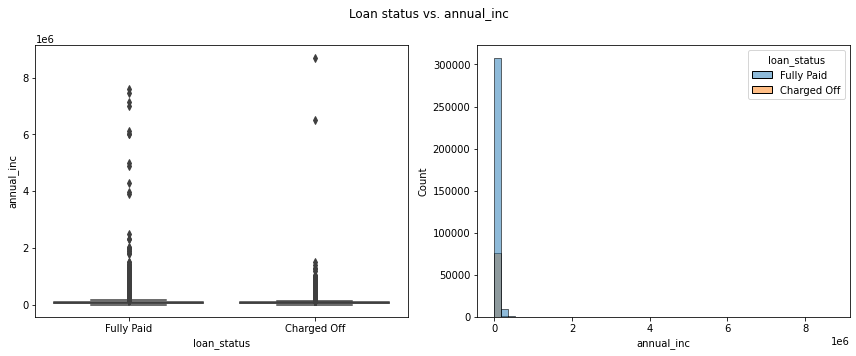

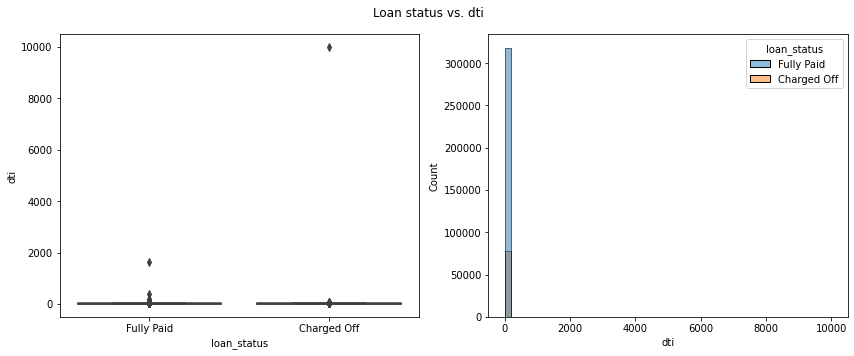

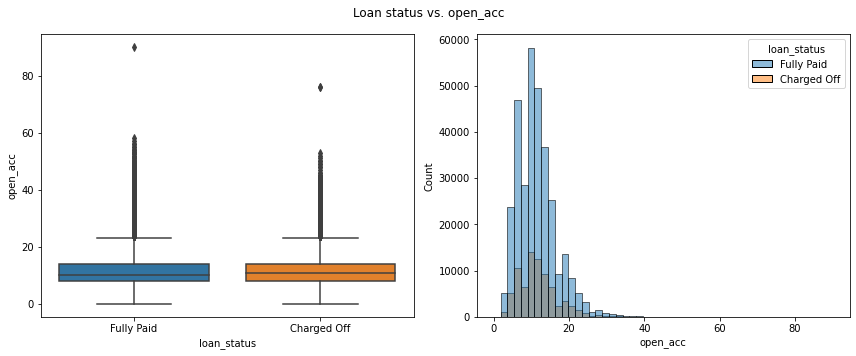

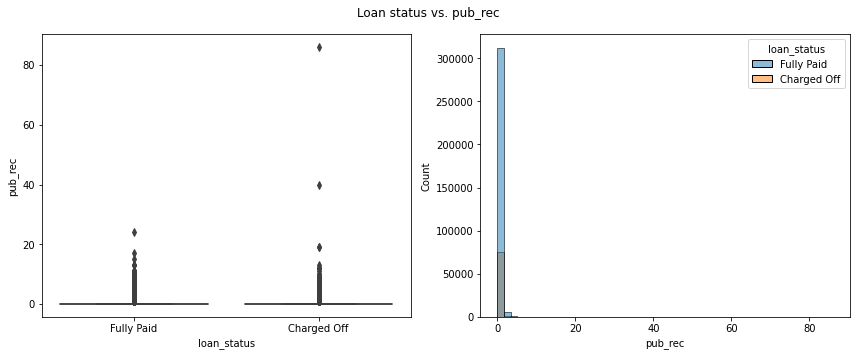

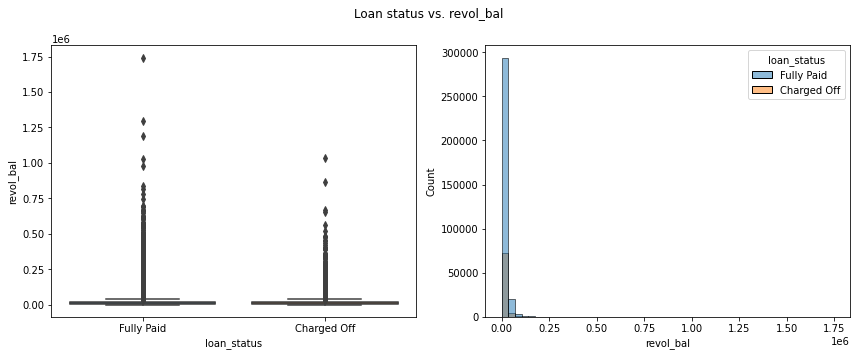

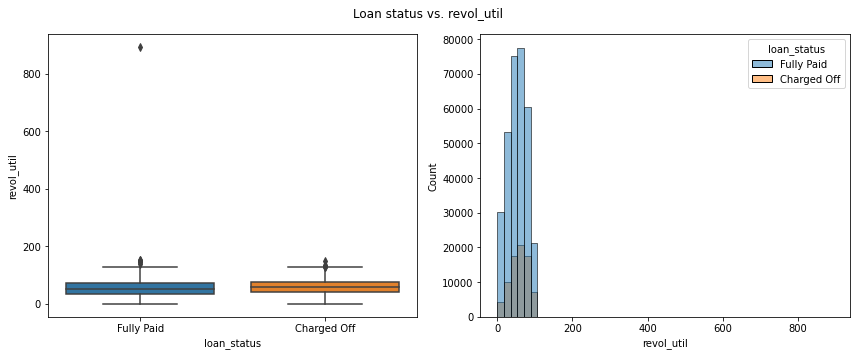

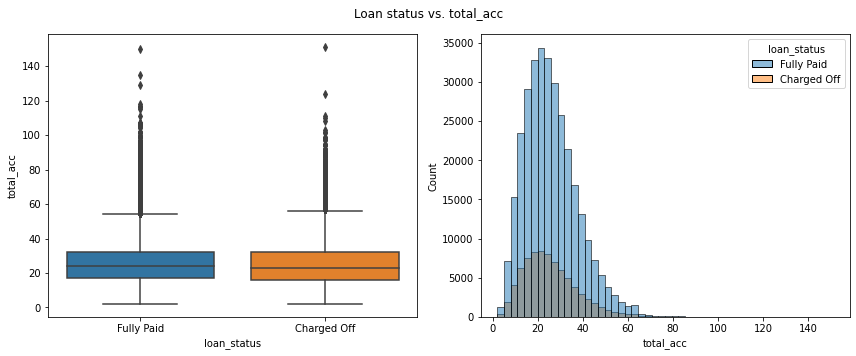

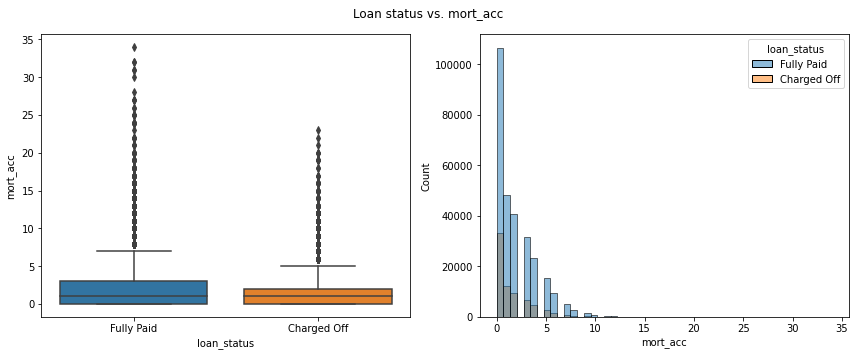

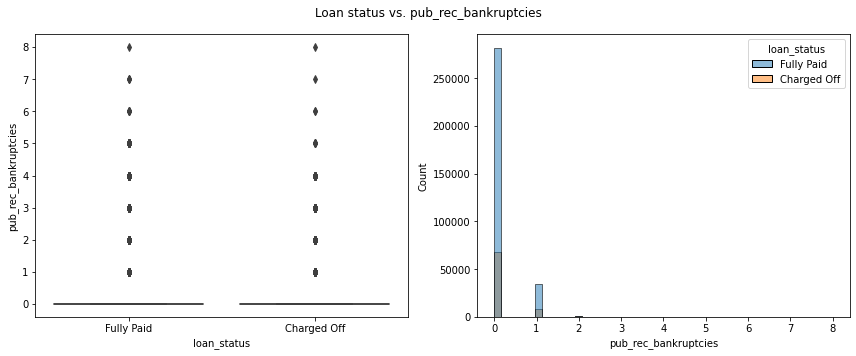

In [24]:
# Numerical features
for col in num_feat:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(y=df[col], x=df['loan_status'], ax=axes[0])
    sns.histplot(x=df[col], hue=df['loan_status'], bins=50, ax=axes[1])
    plt.suptitle(f'Loan status vs. {col}')
    plt.tight_layout()
    plt.show()

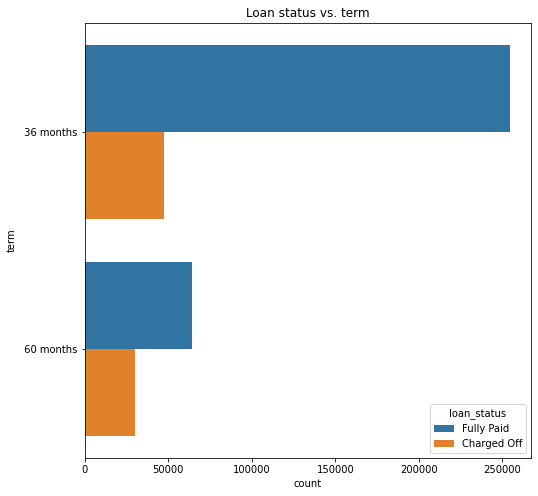

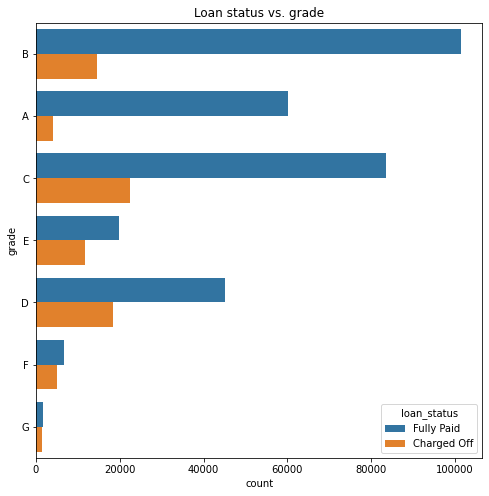

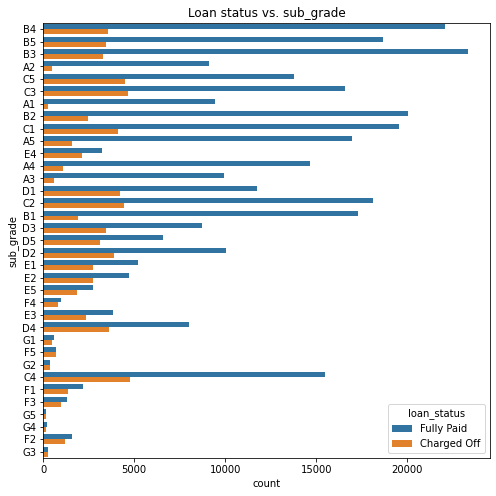

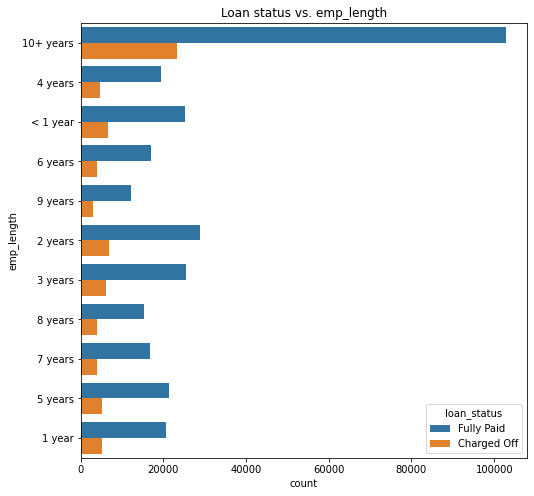

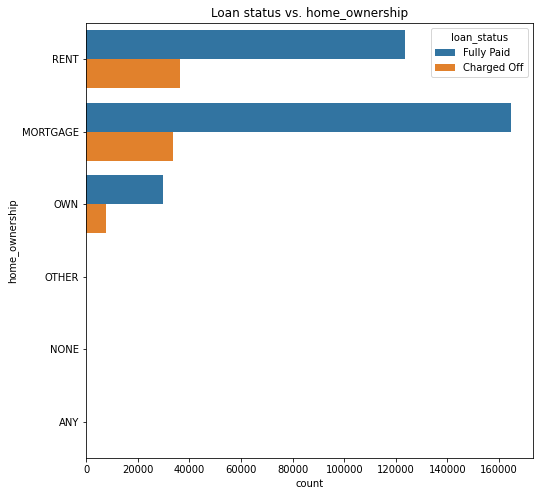

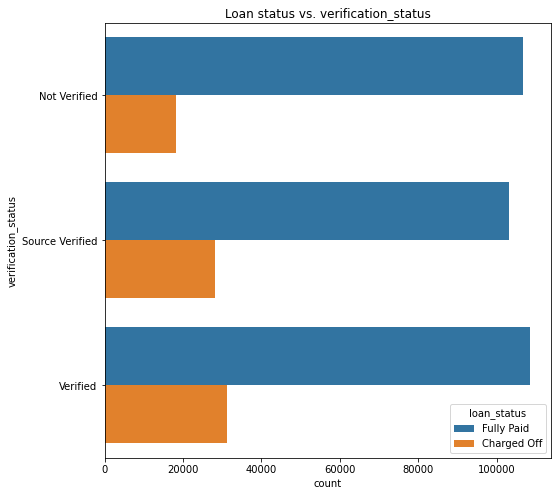

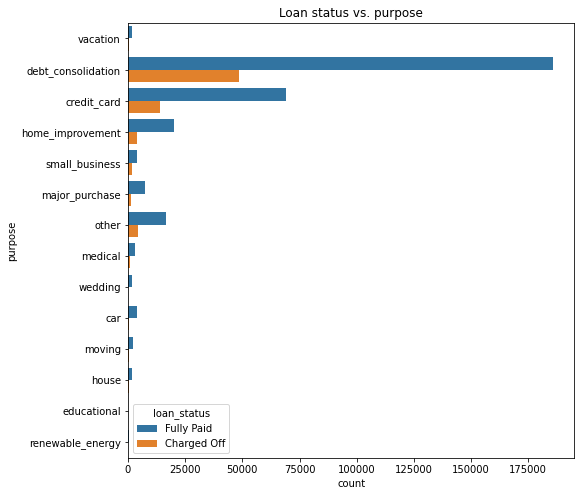

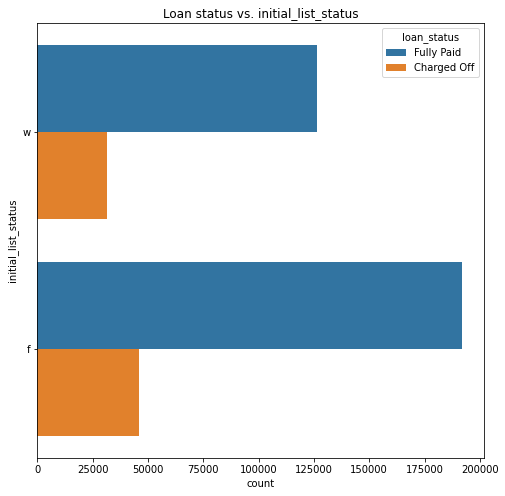

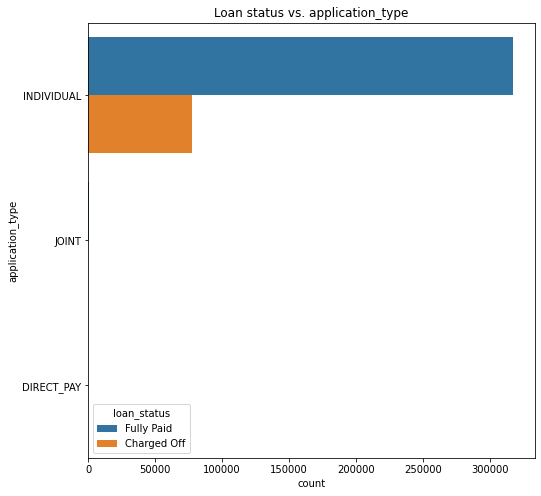

In [25]:
# Categorical features
feats = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']
for feat in feats:
    plt.figure(figsize=(8, 8))
    sns.countplot(y=feat, data=df, hue='loan_status')
    plt.title(f'Loan status vs. {feat}')
    plt.show()

### Correlation heatmap
I'm not visualizing using pairplots because the number of features is high and won't be able to gauge anything from it.

<AxesSubplot:>

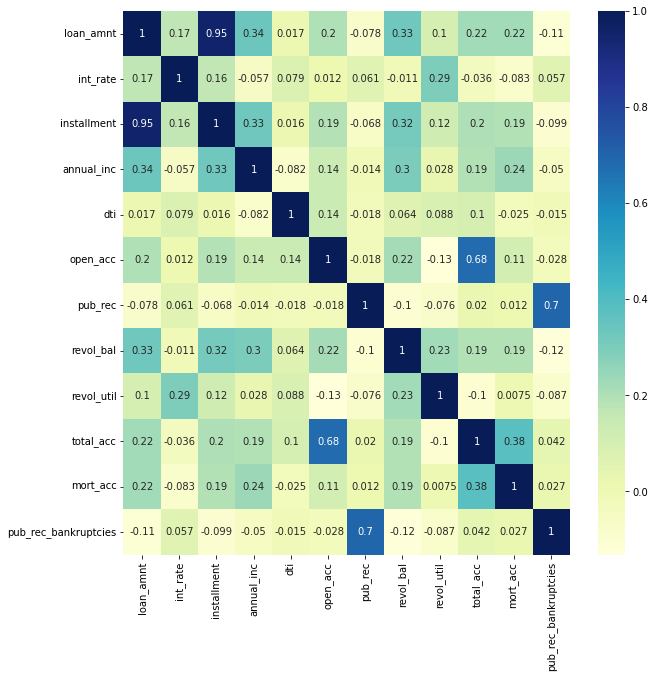

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

## Illustrate the insights based on EDA

### Comments on range of attributes, outliers of various attributes

I have covered the observations & insights about range and distribution of values in each column in `Non-Graphical Analysis` section

### Comments on the distribution of the variables and relationship between them
### Comments for each univariate and bivariate plots

I've combined the insights of all 3 sections below

* All numerical feature follows a skewed distribution and all of them have presence of outliers w.r.t loan_status.
* The numerical features also have similar distribution for both categories of loan_status (target) feature. Except in int_rate feature, the median rate is higher for charged-off loans compared to fully paid ones.
* 5 year loans have higher ratio of defaulting as compared to 3 year loans.
* C & D grade loans have higher tendency to default while grade A loan has lesser tendency to default.
* Borrowers with 10+ years of experience have higher cases of charged off loan but the number of records for 10+ yoe is also high. While other categories have almost similar distribution of paid & charged-off loans.
* Mortgage has better paid to charged-off loans ratio compared to other home-ownership types.
* The distribution of loan_status categories is similar for verification_status feature.
* Debt consolidation, credit card & home improvement sees the most number of loans.
* Fractional loan has better paid to charged-off loans ratio compared to whole loans.
* Since, almost all loans are individual the number of records with category is high but the chances of defaulting for individual loans is comparatively lesser.

Comparing the correlations among independent features:
* `loan_amnt` & `installment` are very highly correlated
* `pub_rec` & `pub_rec_bankruptcies` are moderately correlated

# 2. Data Preprocessing

## Duplicate value check 

In [27]:
df.duplicated().sum()

0

There are no duplicates in the dataset.

## Missing value treatment

I'll drop the missing values from all columns except `title`, as I am going to drop that column ahead anyways.

I am dropping missing values because even after dropping we still have enough data for training and the distribution of target feature `loan_status` doesn't change much.

In [28]:
# Percentage of missing values present in each column
df.isna().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [29]:
# Dropping the missing values
df.dropna(subset=['emp_title', 'emp_length', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies'], inplace=True)
df.reset_index(drop=True, inplace=True)

## Feature Engineering

Here are the changes I am making:
* Changing datatype of `term` from object to int
* Converting `earliest_cr_line` & `issue_d` into date-time features and then create credit_history feature using them 
* Converting `pub_rec`, `mort_acc` & `pub_rec_bankruptcies` into a flag (0 or 1)
* Creating a new feature `open_acc_ratio` from `open_acc` & `total_acc` 
* Dropping the `title` feature, as I feel its information is captured by `purpose` feature

In [30]:
df_new = df.copy()

# Change datatype of term feature
df_new['term'] = df_new['term'].apply(lambda x: int(x.split()[0]))

# Converting earliest_cr_line & issue_d into date-time features
df_new['earliest_cr_line'] = pd.to_datetime(df_new['earliest_cr_line'])
df_new['issue_d'] = pd.to_datetime(df_new['issue_d'])

df_new['credit_history_months'] = ((pd.to_datetime(df['issue_d']) - pd.to_datetime(df['earliest_cr_line'])) /np.timedelta64(1, 'M')).astype('int')

df_new.drop(['earliest_cr_line', 'issue_d'], axis=1, inplace=True)

# Converting pub_rec, mort_acc & pub_rec_bankruptcies into a flag (0 or 1)
def convert_to_flag(x):
    if x > 0:
        return 1
    else: 
        return 0

for col in ['pub_rec', 'mort_acc', 'pub_rec_bankruptcies']:
    df_new[col] = df_new[col].apply(convert_to_flag)
    

# Creating a new feature open_acc_ratio from open_acc & total_acc
df_new['open_acc_ratio'] = df_new['open_acc'] / df_new['total_acc']
df_new.drop(['open_acc', 'total_acc'], axis=1, inplace=True)

# Dropping title feature
df_new.drop('title', axis=1, inplace=True)

df_new.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,credit_history_months,open_acc_ratio
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0,36369.0,41.8,w,INDIVIDUAL,0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",295,0.640000
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0,20131.0,53.3,f,INDIVIDUAL,1,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",126,0.629630
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0,11987.0,92.2,f,INDIVIDUAL,0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",89,0.500000
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0,5472.0,21.5,f,INDIVIDUAL,0,0,"823 Reid Ford\r\nDelacruzside, MA 00813",98,0.461538
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0,24584.0,69.8,f,INDIVIDUAL,1,0,"679 Luna Roads\r\nGreggshire, VA 11650",169,0.302326


## Outlier treatment

As Logistic regression use sigmoid function, it squishes all the values between 0 & 1. This reduces the impact of outliers on model. So, for that reason I'll leave outliers be as is.

## Data preparation for modeling
I perform different types of categorical encoding & some feature engineering as well
* Encoding the target feature `loan_status`: 0 -> Fully paid & 1 -> Charged off
* I'll extract pincode (last 5 digits) from address feature
* Bunch less frequent categories in a feature then perform encoding 
* One hot encoding for features: `grade`, `home_ownership`, `verification_status`, `purpose`, `initial_list_status`, `application_type`, `pincode`
* Frequency encoding for features with large number of categories: `sub_grade`, `emp_title`
* Label encoding for feature: `emp_length`

Then perform the following steps:
* Split the data into training & test data
* Scale the data using training parameters. Here, I'll use MinMaxScaler because almost all features have non-Gaussian distribution.
* Checking the assumption of multi-collinearity using VIF and dropping columns with VIF > 10 or VIF > 5

In [31]:
# Encoding the target feature 
mapper = {'Fully Paid': 0, 'Charged Off': 1}
df_new['loan_status'] = df_new['loan_status'].map(mapper)

In [32]:
# Extracting pincode from address feature
df_new['pincode'] = df_new['address'].apply(lambda x: x[-5:])
df_new.drop('address', axis=1, inplace=True)

In [33]:
# Bunching less frequent categories together in application_type & home_ownership features
# application_type
df_new.loc[df_new['application_type'] != 'INDIVIDUAL', 'application_type'] = 'OTHER'

# home_ownership
df_new.loc[~(df_new['home_ownership'].isin(['MORTGAGE', 'RENT', 'OWN'])), 'home_ownership'] = 'OTHER'

In [34]:
# Onehot encoding of following features
ohc_cols = ['grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'pincode']
df_new = pd.get_dummies(df_new, columns=ohc_cols, drop_first=True)

In [35]:
# Frequency encoding of following features
# sub_grade
mapper1 = dict(df_new['sub_grade'].value_counts())
df_new['sub_grade'] = df_new['sub_grade'].map(mapper1) 

# emp_title
df_new['emp_title'] = df_new['emp_title'].str.lower()
mapper2 = dict(df_new['emp_title'].value_counts())
df_new['emp_title'] = df_new['emp_title'].map(mapper2) 

In [36]:
# Label encoding of following features
# emp_length
mapper3 = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, 
           '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}
df_new['emp_length'] = df_new['emp_length'].map(mapper3)

In [37]:
# Split the dataset
X, y = df_new.loc[:, df_new.columns!='loan_status'], df_new['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training data shape: {X_train.shape}, {y_train.shape}')
print(f'Testing data shape: {X_test.shape}, {y_test.shape}')

Training data shape: (269919, 51), (269919,)
Testing data shape: (67480, 51), (67480,)


In [38]:
# Standard scaling the training & test data
cols = X_train.columns
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=cols)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=cols)

In [39]:
# Checking multi-collinearity using VIF on the training dataset 
X_train_scaled.drop(['loan_amnt', 'purpose_debt_consolidation', 'int_rate', 'sub_grade'], axis=1, inplace=True)
vifs = {}
for col in X_train_scaled:
    lr = LinearRegression()
    y = X_train_scaled[col]
    x = X_train_scaled.drop(col, axis=1)
    model = lr.fit(x, y)
    r2 = model.score(x, y)
    vif = round(1 / (1 - r2), 2)
    vifs[col] = vif

vifs = dict(sorted(vifs.items(), key=lambda x: x[1], reverse=True))
vifs

{'pub_rec': 4.03,
 'pub_rec_bankruptcies': 4.0,
 'grade_C': 2.47,
 'grade_D': 2.25,
 'grade_B': 2.24,
 'mort_acc': 2.03,
 'home_ownership_RENT': 2.0,
 'pincode_70466': 1.93,
 'grade_E': 1.92,
 'pincode_22690': 1.92,
 'pincode_30723': 1.92,
 'pincode_48052': 1.91,
 'pincode_05113': 1.76,
 'pincode_29597': 1.76,
 'verification_status_Verified': 1.62,
 'verification_status_Source Verified': 1.49,
 'term': 1.46,
 'grade_F': 1.46,
 'installment': 1.42,
 'annual_inc': 1.33,
 'revol_bal': 1.33,
 'revol_util': 1.25,
 'credit_history_months': 1.24,
 'pincode_11650': 1.23,
 'pincode_93700': 1.23,
 'pincode_86630': 1.22,
 'open_acc_ratio': 1.19,
 'home_ownership_OWN': 1.19,
 'dti': 1.18,
 'grade_G': 1.14,
 'emp_length': 1.1,
 'purpose_credit_card': 1.1,
 'purpose_home_improvement': 1.08,
 'purpose_other': 1.08,
 'initial_list_status_w': 1.05,
 'purpose_major_purchase': 1.03,
 'purpose_small_business': 1.03,
 'purpose_medical': 1.02,
 'purpose_moving': 1.02,
 'purpose_vacation': 1.02,
 'emp_title'

After checking for VIF & removing the column with highest VIF value iteratively, I found that we need to drop the following features from the dataset : `loan_amnt`, `purpose_debt_consolidation`, `int_rate`, `sub_grade`

In [40]:
# Dropping above mentioned columns from test data as well
X_test_scaled.drop(['loan_amnt', 'purpose_debt_consolidation', 'int_rate', 'sub_grade'], axis=1, inplace=True)

# 3. Model building

## Build the Logistic Regression model and comment on the model statistics

I'll be using __sklearn__ library for model training

In [41]:
# Training the model 
logr = LogisticRegression(max_iter=500)
model = logr.fit(X_train_scaled, y_train)
pred_train = model.predict(X_train_scaled)
pred_test = model.predict(X_test_scaled)

## Display model coefficients with column names

In [42]:
# Feature coefficients
coefs = model.coef_.ravel().round(4)
feat_coefs = dict(zip(X_train_scaled.columns, coefs))
feat_coefs = dict(sorted(feat_coefs.items(), key=lambda x: x[1], reverse=True))
feat_coefs

{'pincode_11650': 12.7951,
 'pincode_93700': 12.7819,
 'pincode_86630': 12.7525,
 'pincode_48052': 5.0073,
 'pincode_70466': 4.9706,
 'pincode_30723': 4.9681,
 'pincode_22690': 4.9599,
 'dti': 4.0871,
 'revol_util': 2.3822,
 'grade_G': 1.8941,
 'grade_F': 1.7888,
 'grade_E': 1.6532,
 'grade_D': 1.4081,
 'grade_C': 1.106,
 'home_ownership_OTHER': 0.6546,
 'grade_B': 0.5984,
 'open_acc_ratio': 0.5642,
 'term': 0.4853,
 'purpose_small_business': 0.3556,
 'installment': 0.3478,
 'home_ownership_RENT': 0.2701,
 'purpose_renewable_energy': 0.2443,
 'emp_title': 0.2244,
 'pub_rec': 0.2018,
 'verification_status_Source Verified': 0.1672,
 'home_ownership_OWN': 0.1356,
 'purpose_medical': 0.0995,
 'purpose_major_purchase': 0.0653,
 'verification_status_Verified': 0.0391,
 'purpose_home_improvement': 0.0357,
 'initial_list_status_w': -0.0262,
 'purpose_moving': -0.0296,
 'purpose_other': -0.0416,
 'purpose_credit_card': -0.0719,
 'purpose_vacation': -0.0802,
 'credit_history_months': -0.087,
 'm

In [43]:
# Bias coefficient
intercept = model.intercept_.round(4)[0]
intercept

-8.5619

# 4. Results Evaluation

## ROC AUC curve, Precision recall curve & Classification report

In [44]:
# Checking the different metrics for training data
print(f'Accuracy: {accuracy_score(y_train, pred_train)}')
print('-'*50)
print('Confusion matrix:')
print(confusion_matrix(y_train, pred_train))
print('-'*50)
print('Classification report:')
print(classification_report(y_train, pred_train))

Accuracy: 0.8887036481314765
--------------------------------------------------
Confusion matrix:
[[215182   1458]
 [ 28583  24696]]
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    216640
           1       0.94      0.46      0.62     53279

    accuracy                           0.89    269919
   macro avg       0.91      0.73      0.78    269919
weighted avg       0.89      0.89      0.87    269919



In [45]:
# Checking the different metrics for test data
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print('-'*50)
print('Confusion matrix:')
print(confusion_matrix(y_test, pred_test))
print('-'*50)
print('Classification report:')
print(classification_report(y_test, pred_test))

Accuracy: 0.8890782454060462
--------------------------------------------------
Confusion matrix:
[[53811   358]
 [ 7127  6184]]
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     54169
           1       0.95      0.46      0.62     13311

    accuracy                           0.89     67480
   macro avg       0.91      0.73      0.78     67480
weighted avg       0.90      0.89      0.87     67480



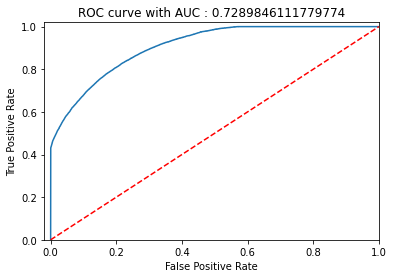

In [46]:
# ROC curve for test data
auc_score = roc_auc_score(y_test, pred_test)
fpr, tpr, thr=roc_curve(y_test, logr.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve with AUC : {auc_score}')
plt.show()

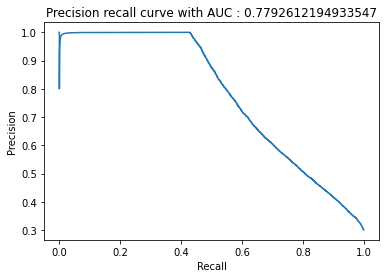

In [47]:
# Precision recall curve for test data
pr, re, thr = precision_recall_curve(y_test, logr.predict_proba(X_test_scaled)[:, 1])
pr_re_auc = auc(re, pr)
plt.figure()
plt.plot(re, pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision recall curve with AUC : {pr_re_auc}')
plt.show()

__Comments__:
* The precision values for both classes (0: Fully-paid & 1: Charged-off) are high but recall for class 1 is low, which brings down its F1 score to 62%.
* For this business case, F1 score is a better metric because:
    * the data is imbalanced
    * both FP & FN are important, reducing FP would give us opportunity to earn money from more people (able to lend money to more people and thus earn interest) and reducing FN would prevent them from giving money to a defaulter and losing it.
* ROC curve indicates that model is better than a random guessing model with AUC score of 0.73.
* Area under the Precision-Recall curve is also metric for imbalanced dataset, which is 0.78 for this case.

## Tradeoff Questions

### 1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

### 2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

In these Business case, both False positives & False Negatives are important because:
* If we have more False positives (borrowers incorrectly classified as defaulters), LoanTap loses opportunity to earn interest from the borrower by lending them money
* On the other hand if we have more False Negatives (defaulters are classified as safe to be given loan), LoanTap is at high risk to incur losses.
Precision is related to FP & Recall is related to FN, and there is always a trade-off between Precision-Recall. So, in this case I feel F1-score is a better metric to track (which considers both Precision & Recall).

To reduce FP & FN:
* Instead of making hard classification, we can predict the probability of a borrower being a defaulter and then carefully chose a threshold to reduce FP & FN with business knowledge.
* Train model with other more complex algorithms and try hyperparameter tuning.

# 5. Actionable Insights & Recommendations 
Insights:
* The Logistic regression model is predicting the negative class (non-defaulters) well but not so well for positive class (defaulters) which might to due class imbalance in the dataset.
* False positives are comparatively lower than False negatives which why Recall is lower than Precision for positive class (defaulters). 
* Important predictors for this classification tasks are: address/pincode, dti (debt to income ratio), revolv_util (revolving balance utilization rate) & grade (grade of loan assigned)

Recommendations:
* LoanTap should collect more data/records for defaulters which also fix the issue of data imbalance. This might help improve the model performance, if it has more information about defaulters.
* Considering the current performance of model, LoanTap should be more cautious in lending loans to correct customers as False negatives are higher comparatively.
* LoanTap should look at these features carefully while giving loans:
    * The address/pincode the customer lives. This a strong predictor, as the standard of living of a customer depends on location and it might be an indicator.
    * Check debt to income ratio of the customer. dti < 35 is good (debt is manageable), dti between 36 - 49 is be careful (there is opportunity to improve) & dti >= 50 is danger (debt is not manageable)
    * Check the utilization rate of credit of the customer. If it is high, then it might be a red flag.
    * Grade of the loan assigned. Grade A customers have the highest chances to fully pay the loan, and these chances keep declining for lower grade loans (B, C, D, E, F & G).

In [51]:
set('aeiou')

{'a', 'e', 'i', 'o', 'u'}